In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [4]:
df_churn = pd.read_csv('telecom_customer_churn.csv')
df_churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
print(f'Dataset have {df_churn.shape[0]} rows and {df_churn.shape[1]} columns\n')
print('Information of Dataset:\n')
df_churn.info()

Dataset have 7043 rows and 38 columns

Information of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64

In [6]:
table = pd.DataFrame({
    "No Unique" : df_churn.nunique(),
    "Missing Value": df_churn.isnull().sum(),
    'NaNN Value': df_churn.isna().sum(),
    'Duplicated' : df_churn.duplicated().sum(),
    'Dtype': df_churn.dtypes
})

table

,No Unique,Missing Value,NaNN Value,Duplicated,Dtype
Customer ID,7043,0,0,0,object
Gender,2,0,0,0,object
Age,62,0,0,0,int64
Married,2,0,0,0,object
Number of Dependents,10,0,0,0,int64
City,1106,0,0,0,object
Zip Code,1626,0,0,0,int64
Latitude,1626,0,0,0,float64
Longitude,1625,0,0,0,float64
Number of Referrals,12,0,0,0,int64


In [7]:
df_churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
df_copy = df_churn.copy()

In [9]:
df_copy.drop(columns = ['Zip Code', 'Latitude', 'Longitude', 'City'],axis =1, inplace = True)

In [11]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_copy['Avg Monthly GB Download'] = knn_imputer.fit_transform(df_copy[['Avg Monthly GB Download']])
df_copy['Avg Monthly Long Distance Charges'] = knn_imputer.fit_transform(df_copy[['Avg Monthly Long Distance Charges']])

In [12]:
from sklearn.impute import SimpleImputer

#setting strategy 'most_freq' to impute by the mode
const_imputer = SimpleImputer(strategy='most_frequent') 
df_copy['Churn Reason'] = const_imputer.fit_transform(df_copy[['Churn Reason']])
df_copy['Churn Category'] = const_imputer.fit_transform(df_copy[['Churn Category']])
df_copy['Unlimited Data'] = const_imputer.fit_transform(df_copy[['Unlimited Data']])
df_copy['Streaming Music'] = const_imputer.fit_transform(df_copy[['Streaming Music']])
df_copy['Streaming Movies'] = const_imputer.fit_transform(df_copy[['Streaming Movies']])
df_copy['Streaming TV'] = const_imputer.fit_transform(df_copy[['Streaming TV']])
df_copy['Premium Tech Support'] = const_imputer.fit_transform(df_copy[['Premium Tech Support']])
df_copy['Device Protection Plan'] = const_imputer.fit_transform(df_copy[['Device Protection Plan']])
df_copy['Online Backup'] = const_imputer.fit_transform(df_copy[['Online Backup']])
df_copy['Online Security'] = const_imputer.fit_transform(df_copy[['Online Security']])
df_copy['Internet Type'] = const_imputer.fit_transform(df_copy[['Internet Type']])
df_copy['Multiple Lines'] = const_imputer.fit_transform(df_copy[['Multiple Lines']])

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [14]:
df_copy.drop(columns=['Customer ID'], axis = 1, inplace = True)

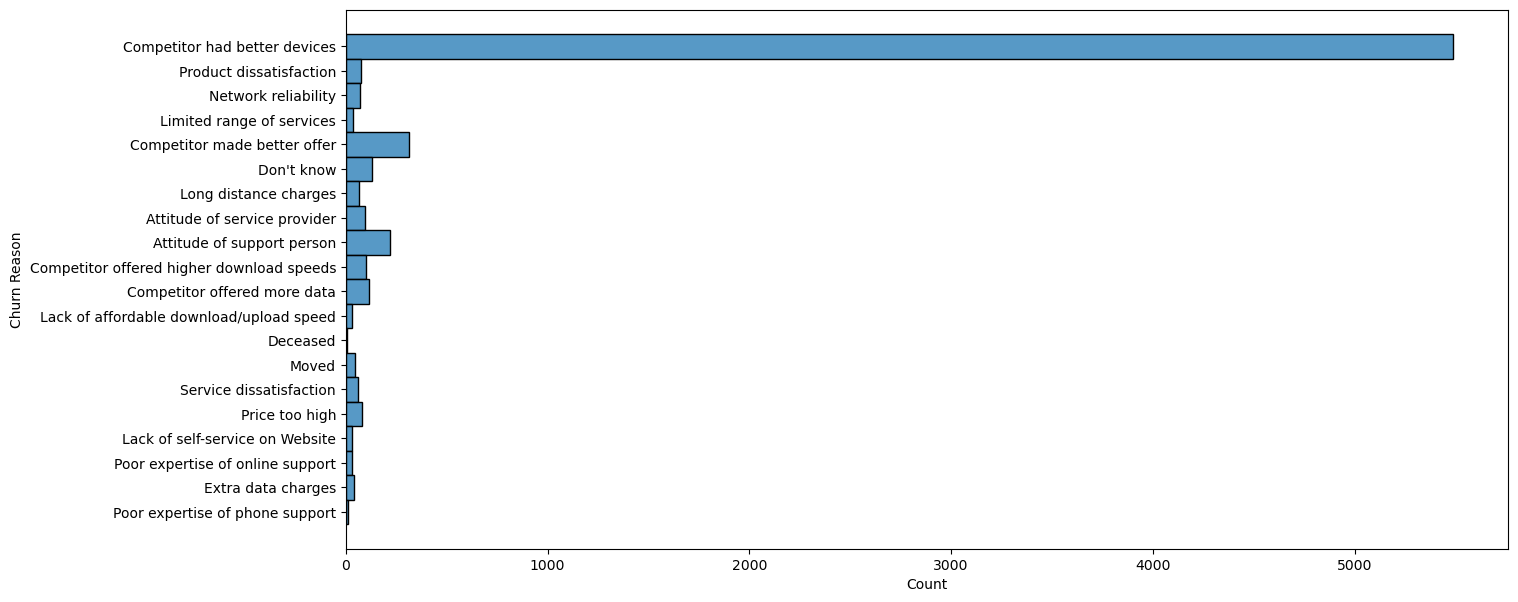

In [15]:
fig, ax = plt.subplots(figsize=(15, 7), dpi=100)
# ax.tick_params(axis='y', rotation=45)
# plot to the existing fig, by using ax=ax
p = sns.histplot(data=df_copy, y='Churn Reason', ax=ax)

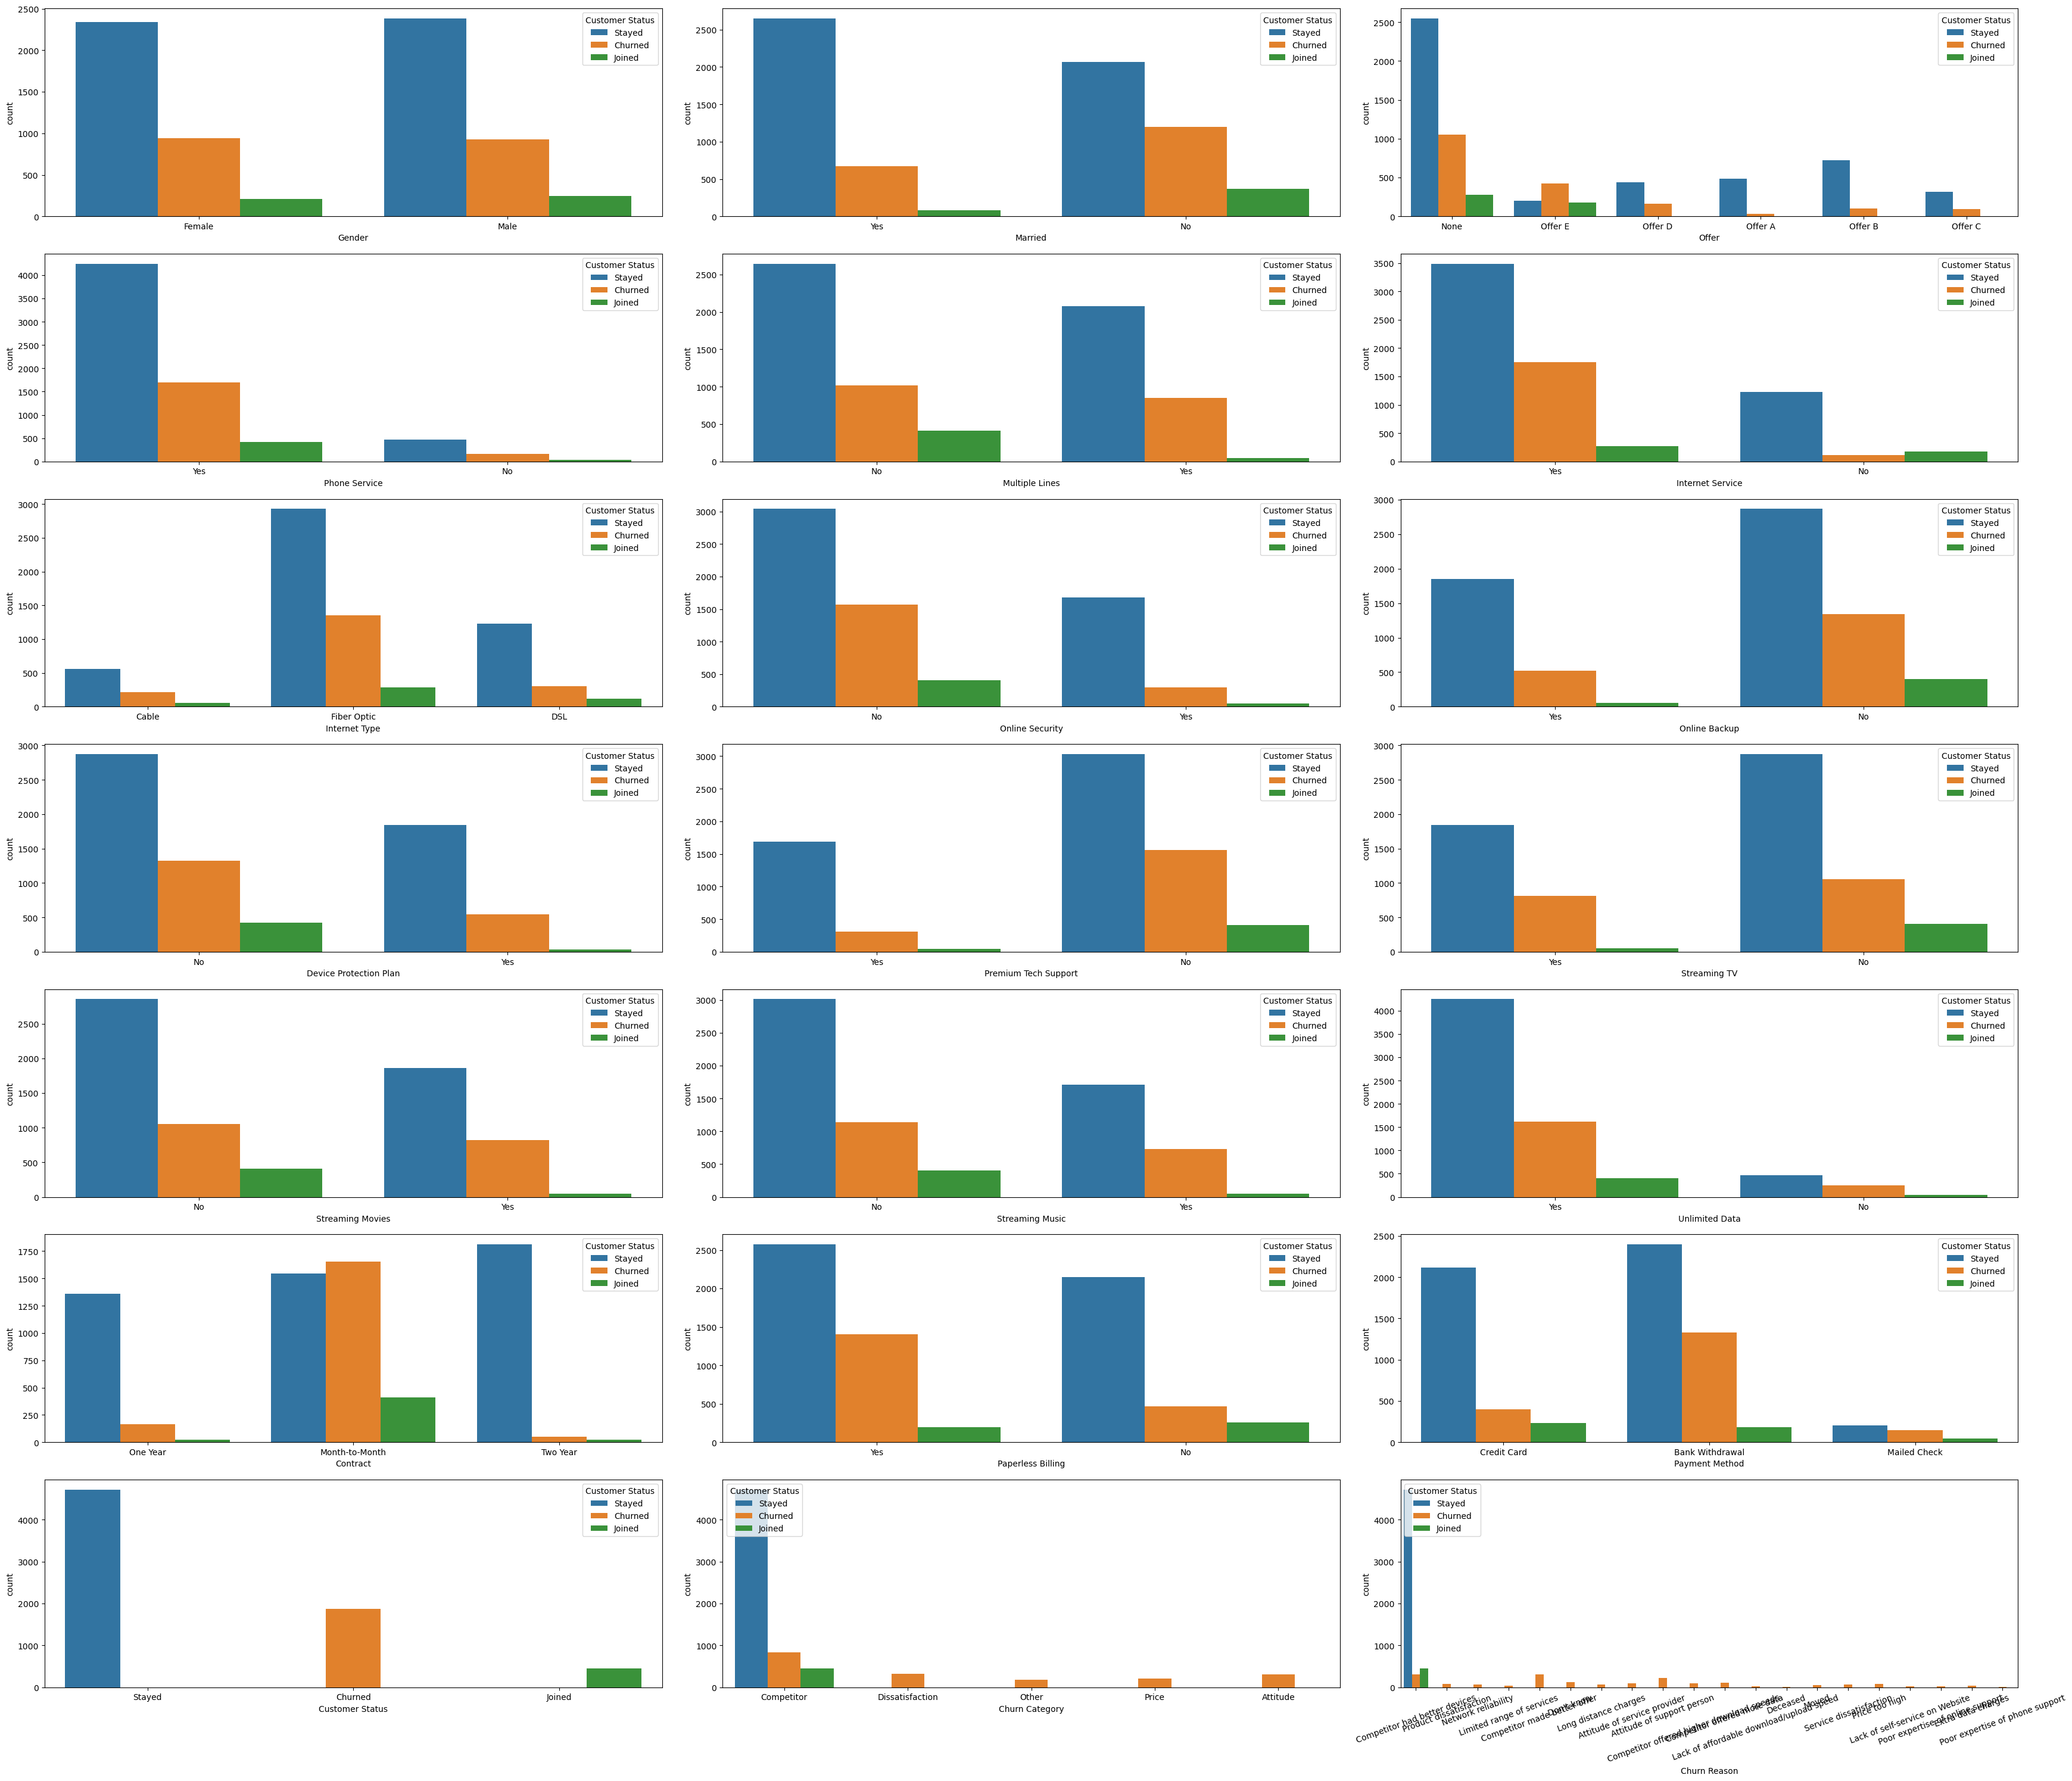

In [16]:
cat = df_copy.select_dtypes(include = "O")

# visualization to display statements from churn, stay and join from categorical data

plt.figure(figsize=(35,45))
for i, col in enumerate(cat.columns):
    axes = plt.subplot(11,3, i + 1)
    sns.countplot(x=cat[col], hue = df_copy['Customer Status'])
plt.tight_layout()
plt.xticks(rotation = 20, fontsize = 10)
plt.show()

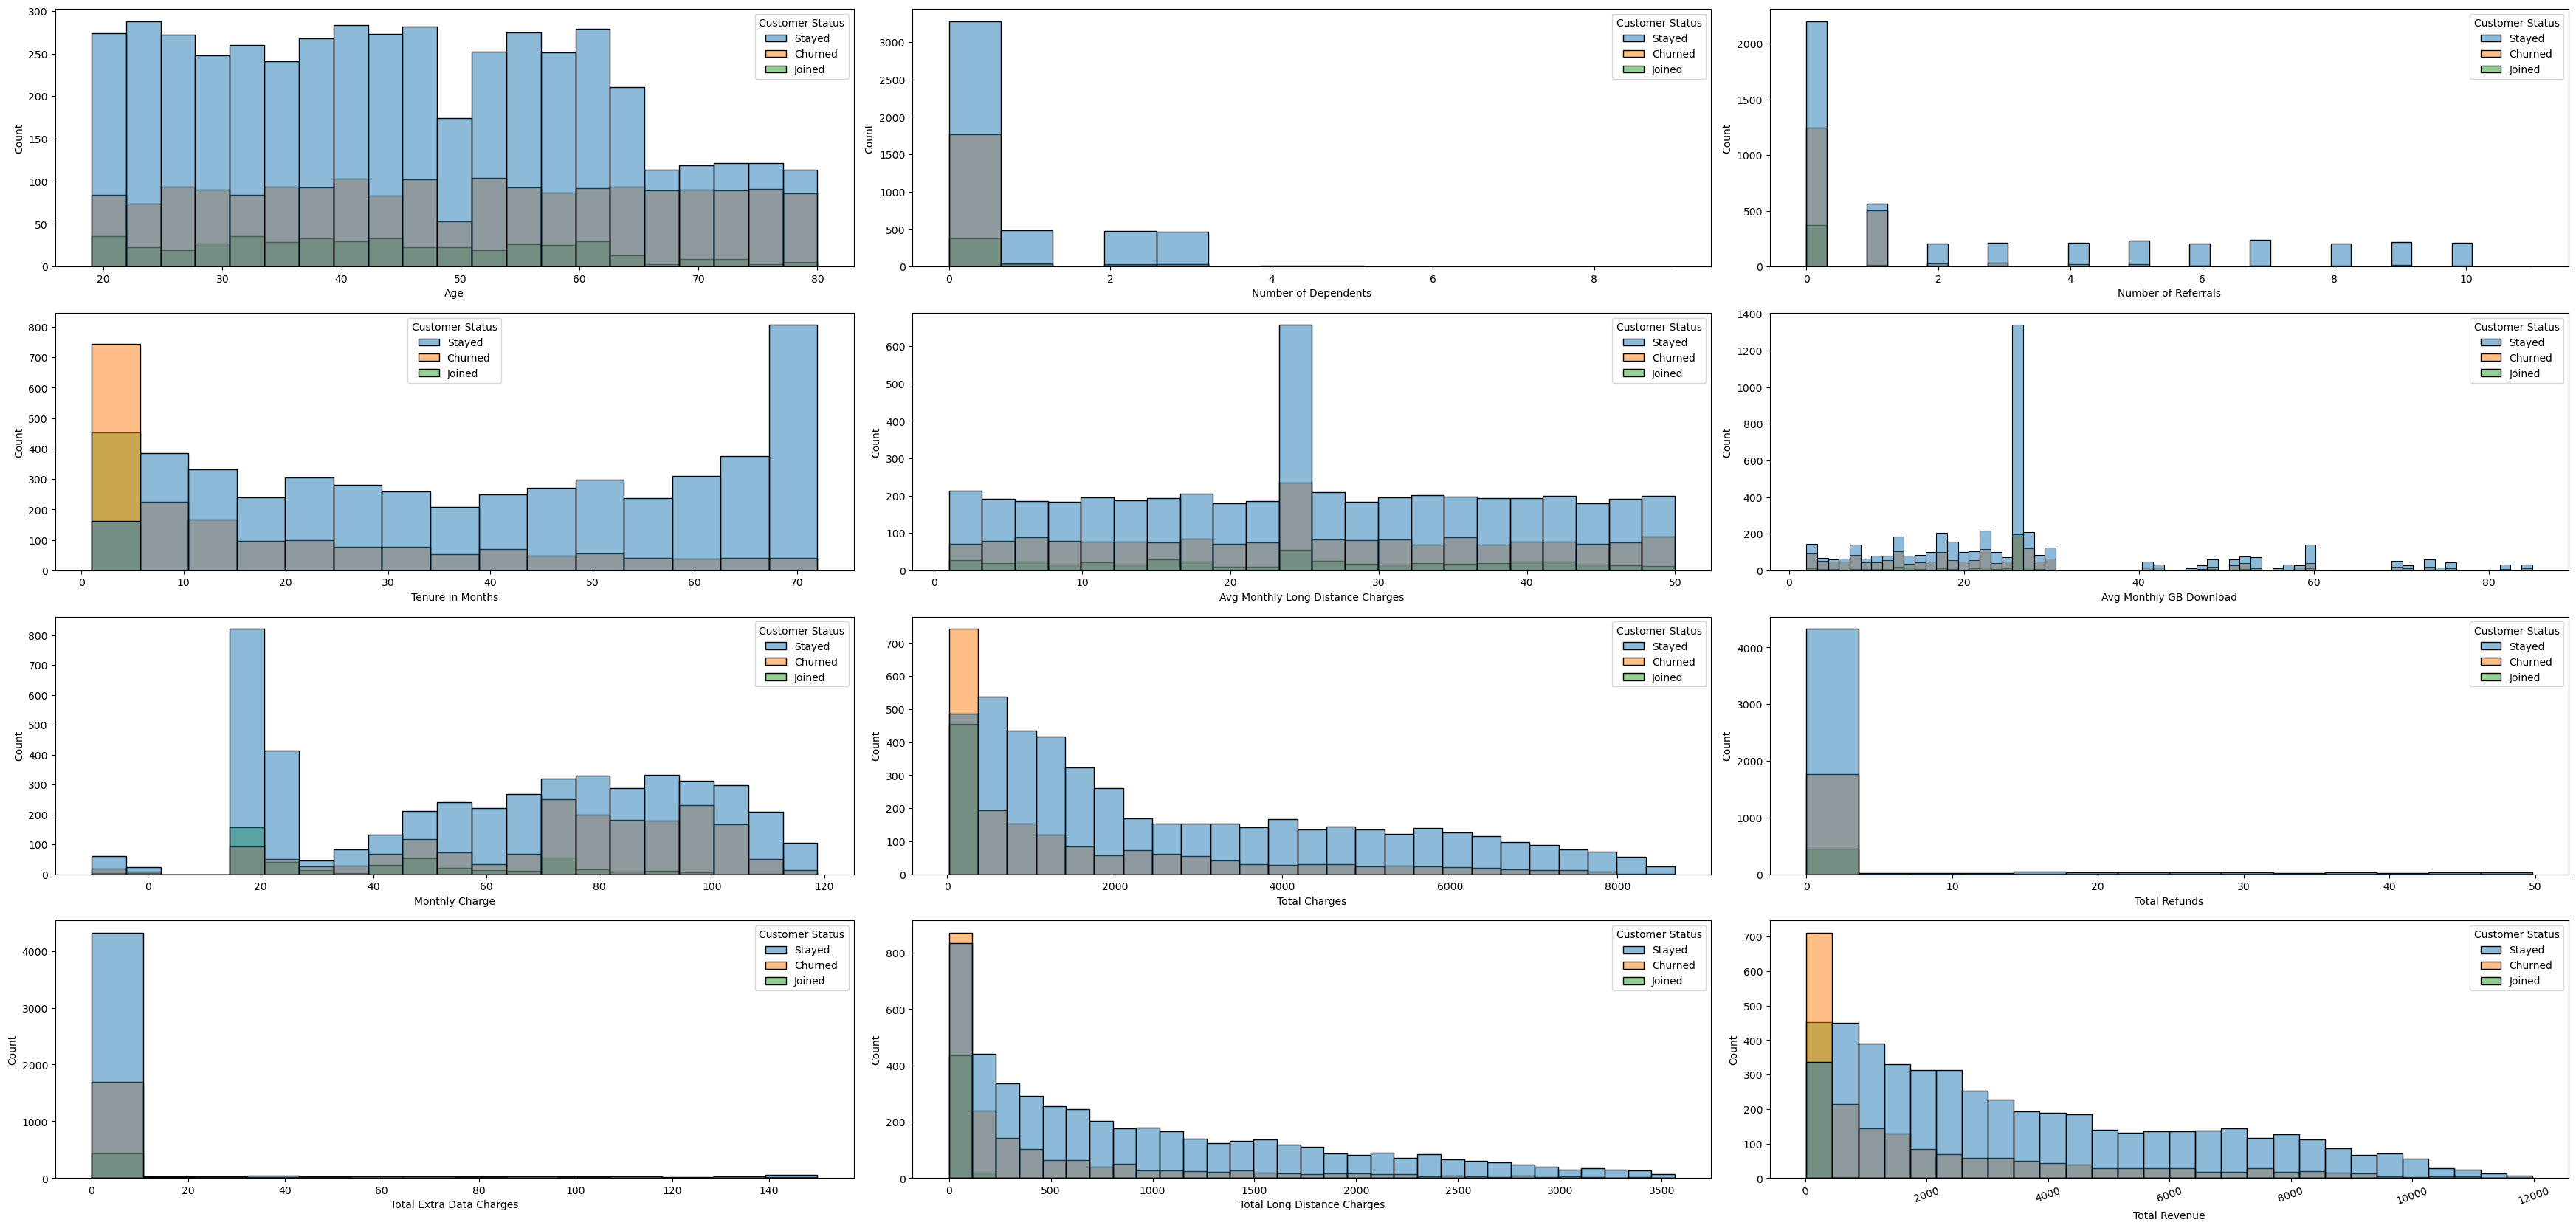

In [17]:
num = df_copy.select_dtypes(exclude = 'O')

plt.figure(figsize=(35,45))
for i, col in enumerate(num.columns):
    axes = plt.subplot(11,3, i + 1)
    sns.histplot(x=num[col], hue = df_copy['Customer Status'])
plt.tight_layout()
plt.xticks(rotation = 20, fontsize = 10)
plt.show()

In [18]:
df_copy["Customer Status"].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [19]:
df_copy = df_copy.loc[df_copy["Customer Status"] != 'Joined']

In [20]:
df_copy.shape

(6589, 33)

In [21]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy['Customer Status'] = le.fit_transform(df_copy['Customer Status'])

In [22]:
num_col = list(df_copy.describe().columns)
cat_col = list(set(df_copy.columns).difference(num_col))

C:\Users\abhis\AppData\Local\Temp\ipykernel_8816\3896537159.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_copy[num_col].corr(), dtype=np.bool)


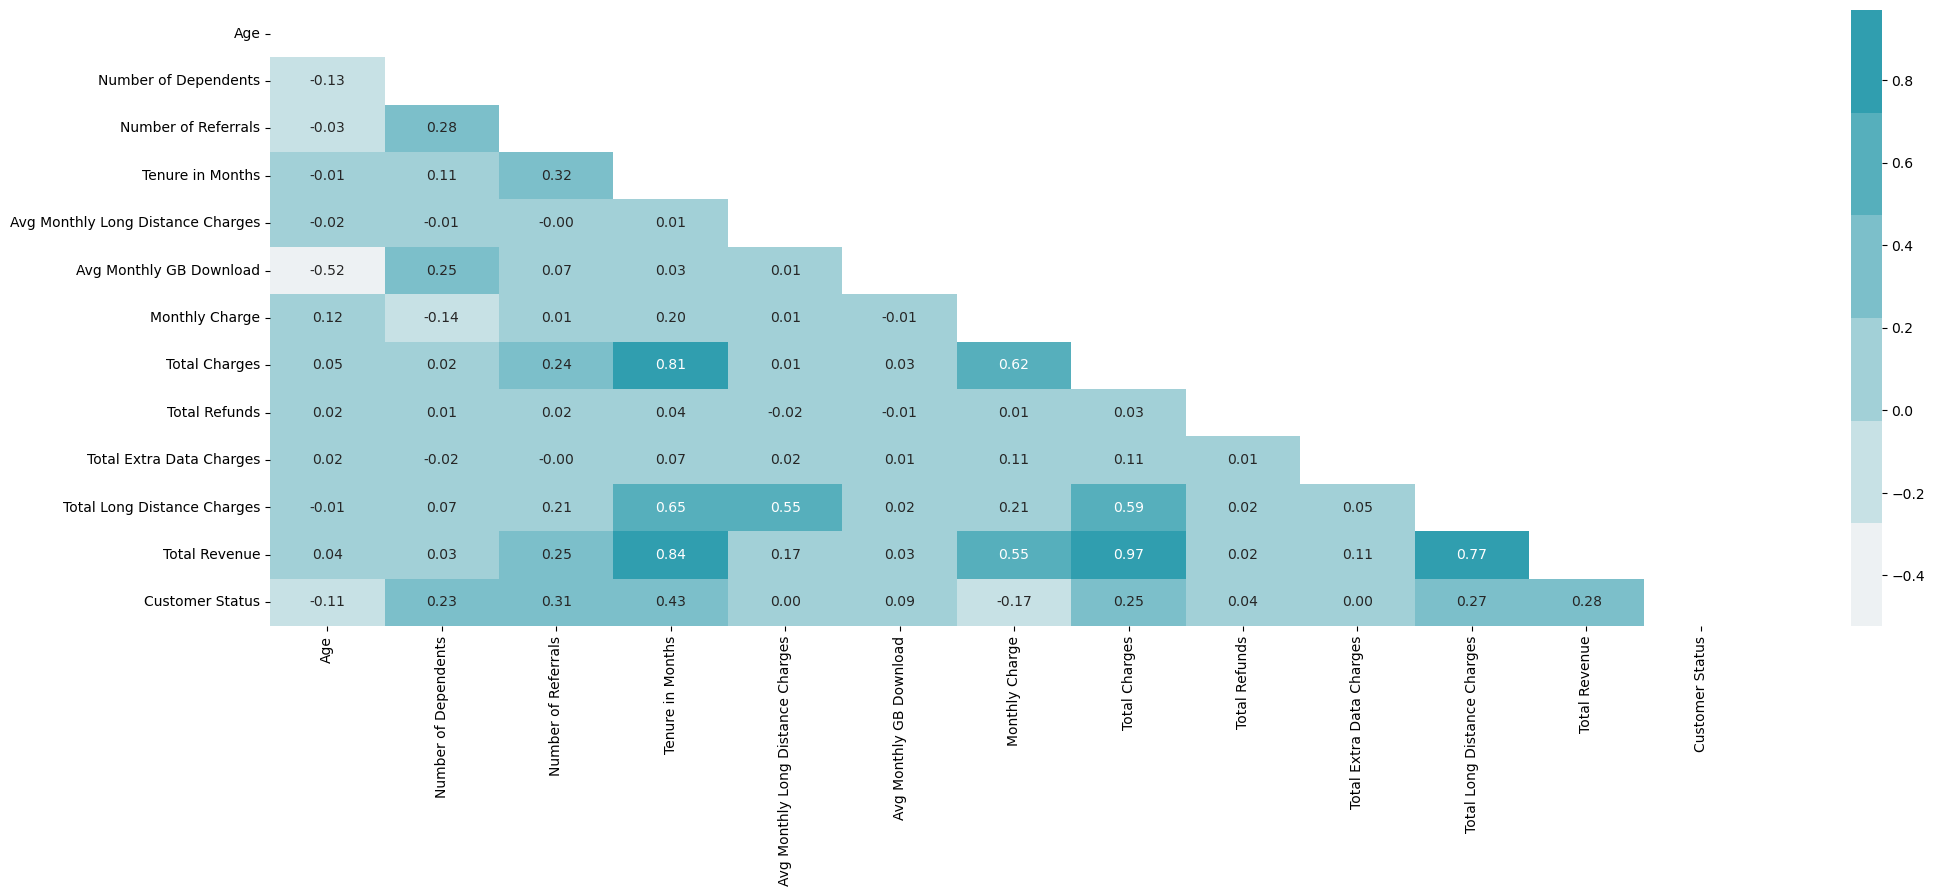

In [23]:
plt.figure(figsize=(24,8))

# Mask for the upper triangle
mask = np.zeros_like(df_copy[num_col].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(10, 220, as_cmap=True)
cmap = sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
sns.heatmap(df_copy[num_col].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");

In [24]:
num_col.remove('Customer Status')

In [25]:
num_col

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [26]:
df_cat = pd.get_dummies(df_copy[cat_col])
df_cat.head()

,Unlimited Data_No,Unlimited Data_Yes,Multiple Lines_No,Multiple Lines_Yes,Streaming Music_No,Streaming Music_Yes,Online Backup_No,Online Backup_Yes,Streaming TV_No,Streaming TV_Yes,...,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Phone Service_No,Phone Service_Yes,Internet Service_No,Internet Service_Yes
0,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [27]:
X = pd.concat([df_copy[num_col], df_cat], axis=1)
X.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Phone Service_No,Phone Service_Yes,Internet Service_No,Internet Service_Yes
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,...,0,0,0,0,0,0,0,1,0,1
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,...,0,0,0,0,0,0,0,1,0,1
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,...,0,0,0,0,1,0,0,1,0,1
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,...,1,0,0,0,0,0,0,1,0,1


In [28]:
y = df_copy['Customer Status']
y.value_counts()

1    4720
0    1869
Name: Customer Status, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [37]:
conda install -c glemaitre imbalanced-learn


Note: you may need to restart the kernel to use updated packages.
Retrieving notices: ...working... done
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2023.01.10-haa95532_0, anaconda/win-64::certifi-2022.12.7-py39haa95532_0, anaconda/win-64::conda-23.1.0-py39haa95532_0
  - anaconda/win-64::ca-certificates-2023.01.10-haa95532_0, anaconda/win-64::certifi-2022.12.7-py39haa95532_0, defaults/win-64::conda-23.1.0-py39haa95532_0
  - anaconda/win-64::certifi-2022.12.7-py39haa95532_0, anaconda/win-64::conda-23.1.0-py39haa95532_0, defaults/win-64::ca-certificates-2023.01.10-haa95532_0
  - anaconda/win-64::certifi-2022.12.7-py39haa95532_0, defaults/win-64::ca-certificates-2023.01.10-haa95532_0, defaults/win-64::conda-23.1.0-py39haa95532_0
  - anaconda/win-64::conda-23.1.0-py39haa95532_0, defaults/win-64::ca-certificates-2023.01.10-haa95532_0, defaults/win-64::certifi-2022.12.7-py39haa95532_0
  - defaults/win-64::ca-certificates-2023.01.10-haa95532_0, defaults/win-64::c

In [38]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X, y = oversample.fit_resample(X, y)

<AxesSubplot:ylabel='Customer Status'>

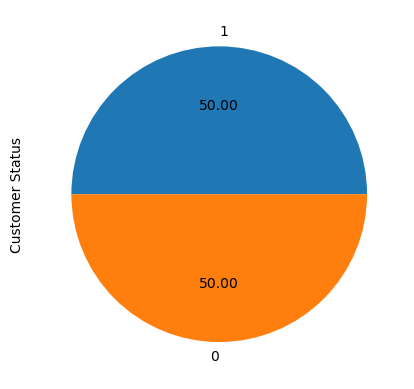

In [39]:
y.value_counts().plot.pie(autopct='%.2f')

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train,res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train,res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
      

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3789
           1       1.00      1.00      1.00      3763

    accuracy                           1.00      7552
   macro avg       1.00      1.00      1.00      7552
weighted avg       1.00      1.00      1.00      7552


Confusion Matrix: 
 [[3789    0]
 [   0 3763]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9694
Accuracy SD: 		 0.0082
Test Result:

accuracy score: 0.9735

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       931
           1       0.99      0.96      0.97       957

    accuracy                           0.97      1888
   macro avg       0.97      0.97      0.97      1888
weighted avg       0.97      0.97      0.97      1888


Confusion Matrix: 
 [[918  13]
 [ 37 920]]

ROC AUC: 0.9737



In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print('')
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3789
           1       1.00      1.00      1.00      3763

    accuracy                           1.00      7552
   macro avg       1.00      1.00      1.00      7552
weighted avg       1.00      1.00      1.00      7552


Confusion Matrix: 
 [[3789    0]
 [   0 3763]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9868
Accuracy SD: 		 0.0052

Test Result:

accuracy score: 0.9862

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       931
           1       0.98      0.99      0.99       957

    accuracy                           0.99      1888
   macro avg       0.99      0.99      0.99      1888
weighted avg       0.99      0.99      0.99      1888


Confusion Matrix: 
 [[915  16]
 [ 10 947]]

ROC AUC: 0.9862



In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9444

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      3789
           1       0.95      0.94      0.94      3763

    accuracy                           0.94      7552
   macro avg       0.94      0.94      0.94      7552
weighted avg       0.94      0.94      0.94      7552


Confusion Matrix: 
 [[3587  202]
 [ 218 3545]]

ROC AUC: 0.9444

Average Accuracy: 	 0.9080
Accuracy SD: 		 0.0097
Test Result:

accuracy score: 0.9184

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       931
           1       0.92      0.92      0.92       957

    accuracy                           0.92      1888
   macro avg       0.92      0.92      0.92      1888
weighted avg       0.92      0.92      0.92      1888


Confusion Matrix: 
 [[855  76]
 [ 78 879]]

ROC AUC: 0.9184

